<a href="https://colab.research.google.com/github/LucaPredieri/MNISTLeNet5/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time
import os
from PIL import Image

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

val_x = train_x[:5000]
val_y = train_y[:5000]

print(test_x[0].shape)
print(train_x[0].shape)
print(train_y[0].shape)

(28, 28, 1)
(28, 28, 1)
()


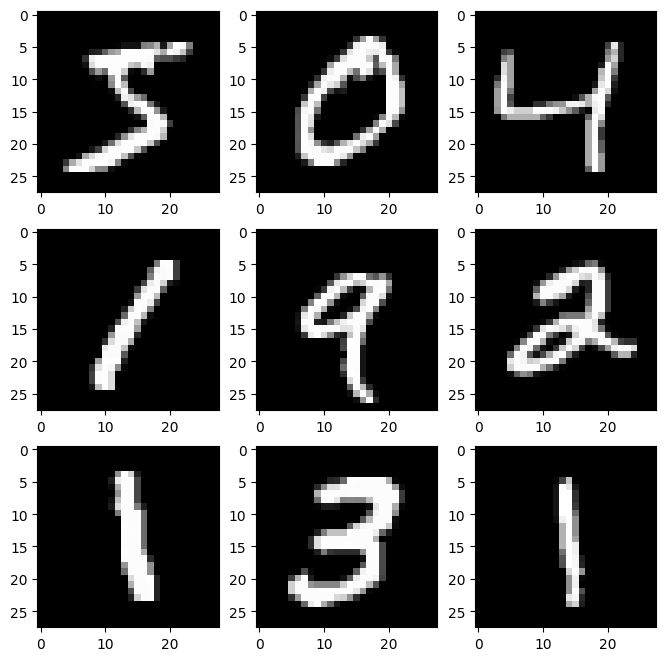

In [ ]:
from numpy import load
import matplotlib.pyplot as plt

data = load('/content/drive/MyDrive/Tesi/Datasets/mnist.npz')
lst = data.files
#for item in lst:
#    print(item)
#    print(data[item])

x_test = data['x_test']

fig, ax = plt.subplots(3, 3, figsize=(8, 8))

# Loop over the first 9 test images and plot them in the subplot grid
for i in range(0, 9):
    image = data['x_train'][i]
    #label = data['y_train'][i]
    row_idx = i // 3
    col_idx = i % 3
    ax[row_idx, col_idx].imshow(image, cmap='gray')
    #ax[row_idx, col_idx].set_title(data['y_train'][label])

plt.show()

# Structure of LeNet-5

LeNet-5 consists of seven layers, which are as follows:

Input layer: This layer takes in the input image. In the case of the MNIST 
dataset, which consists of grayscale images of handwritten digits, the input 
layer has dimensions of 32x32x1. Here 28x28x1.

Convolutional layer: The first layer is a convolutional layer, which convolves 
the input image with a set of learnable filters to produce a set of feature 
maps. In LeNet-5, the convolutional layer has six filters of size 5x5x1.

Average pooling layer: The output of the first convolutional layer is fed into 
an average pooling layer, which reduces the size of the feature maps by taking
the average value of each 2x2 region. This layer helps to make the network more 
robust to small translations of the input image.

Convolutional layer: The second convolutional layer convolves the output of the 
first pooling layer with a set of 16 filters of size 5x5x6.

Average pooling layer: The output of the second convolutional layer is fed into 
another average pooling layer, which reduces the size of the feature maps again.

Fully connected layer: The output of the second pooling layer is flattened and 
fed into a fully connected layer with 120 neurons. This layer serves as a 
feature extractor, mapping the input image to a set of high-level features.

Fully connected layer: The output of the previous layer is fed into another 
fully connected layer with 84 neurons, which further processes the extracted 
features.

Output layer: The final layer is a fully connected layer with 10 neurons, 
corresponding to the 10 possible digits (0-9). The output of this layer is a 
probability distribution over the possible digits, and the digit with the 
highest probability is the predicted digit.



In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    #keras.layers.Dropout(0.25), # special
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dropout(0.25), #special
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# Performance

Performance with Dropout layers:



> <code>
Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3139 - accuracy: 0.9058 - val_loss: 0.1156 - val_accuracy: 0.9652w
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1411 - accuracy: 0.9576 - val_loss: 0.0622 - val_accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0966 - accuracy: 0.9703 - val_loss: 0.0513 - val_accuracy: 0.9850
Epoch 4/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0785 - accuracy: 0.9759 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0675 - accuracy: 0.9793 - val_loss: 0.0332 - val_accuracy: 0.9898
313/313 [==============================] - 3s 8ms/step - loss: 0.0445 - accuracy: 0.9859
[0.04446587339043617, 0.9858999848365784]
</code>

Performance with no dropouts:


> <code>
Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2273 - accuracy: 0.9306 - val_loss: 0.0961 - val_accuracy: 0.9708
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0871 - accuracy: 0.9733 - val_loss: 0.0651 - val_accuracy: 0.9804
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0600 - accuracy: 0.9815 - val_loss: 0.0391 - val_accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0300 - val_accuracy: 0.9914
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.0264 - val_accuracy: 0.9922
</code>


Performance with a dropout layer (fore the softmax):


> <code>
Epoch 1/5
1875/1875 [==============================] - 45s 23ms/step - loss: 0.2531 - accuracy: 0.9248 - val_loss: 0.0900 - val_accuracy: 0.9754
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0999 - accuracy: 0.9693 - val_loss: 0.0529 - val_accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0681 - accuracy: 0.9790 - val_loss: 0.0448 - val_accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0533 - accuracy: 0.9835 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0284 - val_accuracy: 0.9928
</code>








In [ ]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y), callbacks=[tensorboard_cb])

Epoch 1/5
1875/1875 [==============================] - 45s 23ms/step - loss: 0.2531 - accuracy: 0.9248 - val_loss: 0.0900 - val_accuracy: 0.9754
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0999 - accuracy: 0.9693 - val_loss: 0.0529 - val_accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0681 - accuracy: 0.9790 - val_loss: 0.0448 - val_accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0533 - accuracy: 0.9835 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0284 - val_accuracy: 0.9928


In [ ]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 3s 9ms/step - loss: 0.0453 - accuracy: 0.9857


[0.045300740748643875, 0.9857000112533569]

# Testing

For trying a new image prediction, connect GDrive and upload an image you want to classify.

In [ ]:
image = Image.open('/content/drive/MyDrive/Tesi/Datasets/3_2.png')

new_size = (28, 28)
image = image.resize(new_size)
gray_image = image.convert('L')
gray_image.show()
image_array = np.array(gray_image).reshape((1, 28, 28, 1)) / 255.0

print(np.argmax(lenet_5_model.predict(image_array)))

1/1 [==============================] - 0s 113ms/step
3
